In [1]:
import matplotlib.pyplot as plt
import numpy as np

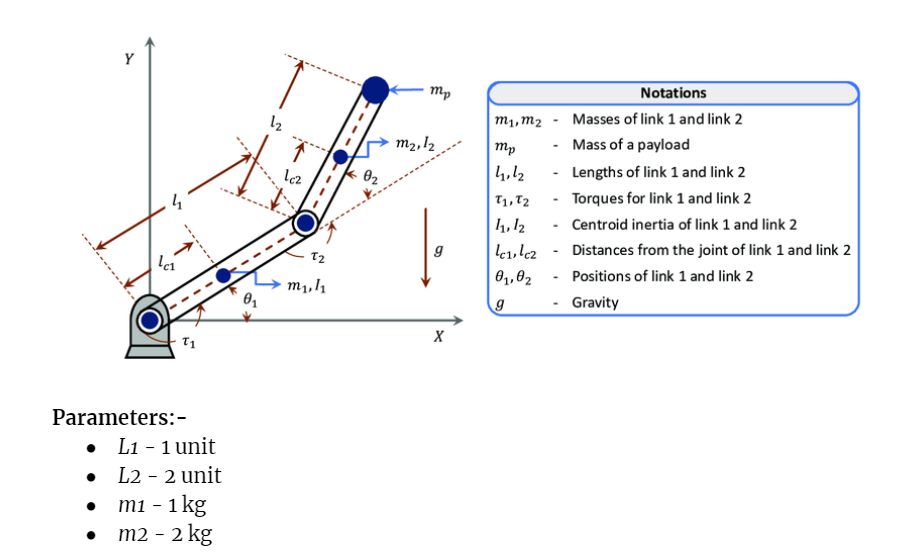

In [2]:
L1=1
L2 =2
m1=1
m2=2

# Level 1: Navigating the Cartesian Plane [10 Points]

Participants must utilise their programming prowess to command RoboRig to navigate to a specified position on the Cartesian plane. Armed with the knowledge of kinematics, you must guide RoboRig through the intricate pathways of the plane, ensuring it reaches the designated destination flawlessly. The desired destination point on the Cartesian plane must be clearly indicated, allowing easy visualisation of the target location. This ensures that participants can accurately assess whether RoboRig's end effector has reached the intended position or not.

In [3]:
def inverse_kinematics(x_target,y_target):
  global L1,L2
  theta2 = np.arccos((x_target**2 + y_target**2 - L1**2 - L2**2)/(2*L1*L2))
  theta1 = np.arctan2(y_target, x_target) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))
  return theta1, theta2

destination_x = -1.75
destination_y = 2.0
theta1, theta2 = inverse_kinematics(destination_x, destination_y)
print("Joint angle theta1:", np.degrees(theta1))
print("Joint angle theta2:", np.degrees(theta2))

innercoords = [L1*np.cos(theta1),L1*np.sin(theta1)]
print("Inner Coordinates:",innercoords)

Joint angle theta1: 91.03385476113975
Joint angle theta2: 58.96075998960212
Inner Coordinates: [-0.018043190412205316, 0.9998372083893202]


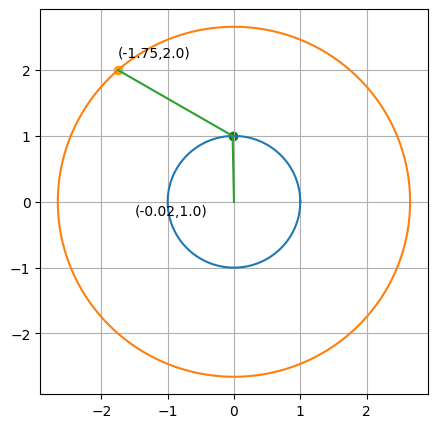

In [5]:
theta = np.linspace( 0 , 2 * np.pi , 150 )

a = L1* np.cos( theta )
b = L1* np.sin( theta )
a1 = np.sqrt((1.75)**2 +(2)**2)* np.cos( theta )
b1 = np.sqrt((1.75)**2 +(2)**2) * np.sin( theta )
plt.figure(figsize=(5,5))

plt.plot(a,b)
plt.plot(a1,b1)

innercoords[0]=round(innercoords[0],2)
innercoords[1]=round(innercoords[1],2)

plt.plot([0,innercoords[0],destination_x],[0,innercoords[1],destination_y])

plt.scatter([innercoords[0]],[innercoords[1]],color='g')
plt.scatter([destination_x],[destination_y],color='orange')
plt.grid()

plt.text(-1.5,-0.2, f'({innercoords[0]},{innercoords[1]})', fontsize = 10)
plt.text(-1.75,2.2, f'({destination_x},{destination_y})', fontsize = 10)
plt.show()

# Level 2: Following the Smooth Trajectory [20 Points]

In this phase of the challenge, participants will guide RoboRig through a journey of graceful curves, navigating a circular path with elegance and poise. Your objective is to program RoboRig to follow a jerk-free trajectory, demonstrating mastery over kinematic control. The task involves guiding RoboRig along a predefined circular trajectory with precision and smoothness. Participants must not only ensure that RoboRig traverses the circular path accurately but also maintains a continuous motion throughout the journey. Clear visualisation of both the desired trajectory and the trajectory followed by RoboRig is essential. The simulation should distinctly display the circular path and RoboRig's movement, enabling easy assessment of whether the end effector reaches the intended trajectory. Submit the .csv file along with code and simulation results, which may contain three columns-(time, X-coordinate, Y-coordinate).
Trajectory: Circle [ Center- (0 , 2.1) , Radius- 1]


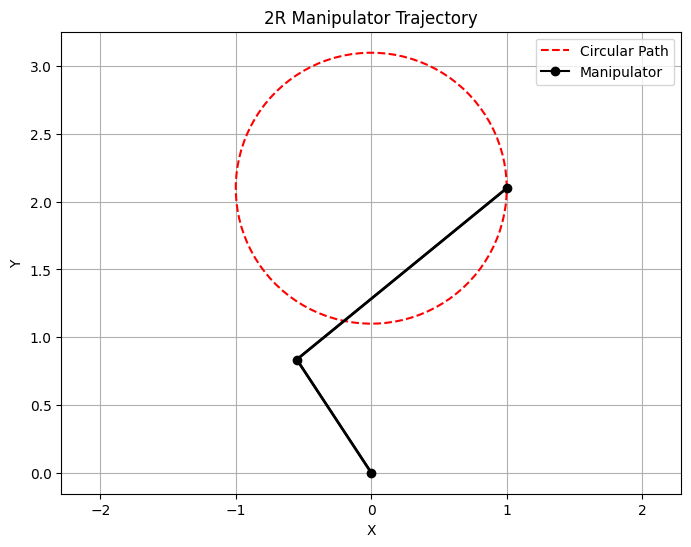

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

center = (0, 2.1)  # Center of the circular path
radius = 1  # Radius of the circular path


num_points = 100  # Number of points on the trajectory
theta = np.linspace(0, 2*np.pi, num_points)  # Angles from 0 to 2*pi
x_traj = center[0] + radius * np.cos(theta)
y_traj = center[1] + radius * np.sin(theta)
trajectory_data = np.zeros((num_points, 3))  # Each row: [x_end_effector, y_end_effector, time]


def update(frame):
    plt.cla()
    plt.plot(x_traj, y_traj, 'r--', label='Circular Path')
    x_target = x_traj[frame]
    y_target = y_traj[frame]

    #  distance from the origin to the target point
    dist_to_target = np.sqrt(x_target**2 + y_target**2)
    y_c = 0

    theta2_c =0
    D = (x_target**2 + y_target**2 - L1**2 - L2**2) / (2 * L1 * L2)

    if y_target>=2.9:
      y_target = 2.9


    # positions of the joints
    D = (x_target**2 + y_target**2 - L1**2 - L2**2) / (2 * L1 * L2)
    theta2 = np.arctan2(-np.sqrt(1 - D**2), D)
    theta1 = np.arctan2(y_target, x_target) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))

    x_end_effector = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y_end_effector = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    x_joints = [0, L1 * np.cos(theta1), x_end_effector]
    y_joints = [0, L1 * np.sin(theta1), y_end_effector]
    y_c = y_end_effector

    theta2_c = theta2


    # Plot
    plt.plot(x_joints, y_joints, 'ko-')
    plt.plot([0, x_joints[1]], [0, y_joints[1]], 'k-', linewidth=2)  # First link
    plt.plot([x_joints[1], x_joints[2]], [y_joints[1], y_joints[2]], 'k-', linewidth=2)  # Second link
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2R Manipulator Trajectory')
    plt.axis('equal')
    plt.legend(['Circular Path', 'Manipulator'])
    plt.grid(True)

    trajectory_data[frame, :] = [x_end_effector, y_end_effector, frame]



# animation
fig = plt.figure(figsize=(8, 6))
ani = FuncAnimation(fig, update, frames=num_points, interval=50, repeat=False)

# Save the animation as a video file
writer = FFMpegWriter(fps=15)
ani.save('2_trajectory.mp4', writer=writer)
# Save trajectory data to CSV
np.savetxt('2_trajectory_data.csv', trajectory_data, delimiter=',')

plt.show()


# Level 3:Dynamic Trajectory Manoeuvring

In this dynamic challenge, participants are tasked with equipping RoboRig with the ability to navigate a circular path smoothly and jerk-free using dynamic control. Building upon the foundation laid in previous levels, participants must tackle the added complexity of dynamic motion control, ensuring RoboRig's trajectory remains seamless and precise. As in previous levels, participants must define a circular trajectory for RoboRig to follow. The circular path should be clearly indicated, facilitating easy visualisation of both the desired trajectory and RoboRig's movement. Unlike static kinematic control, dynamic control involves accounting for factors such as inertia, acceleration, and external forces. Participants must implement algorithms to adjust RoboRig's motion dynamically, ensuring smooth and jerk-free movement along the circular path. Clear visualisation of both the desired trajectory and the trajectory followed by RoboRig is crucial for accurate evaluation. The simulation window should distinctly display the circular path and RoboRig's movement, enabling easy assessment of whether the end effector reaches the intended trajectory. Submit the .csv file along with code and simulation results, which may contain three columns-(time, X-coordinate, Y-coordinate)
Trajectory: Circle [ x=sin2t , y=cos2t , total time = 4 sec]



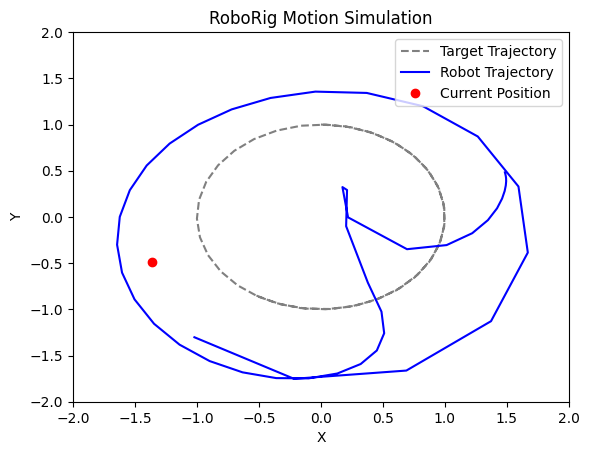

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def compute_jacobian(theta1, theta2, l1, l2):
    J = np.array([[-l1*np.sin(theta1)-l2*np.sin(theta1+theta2), -l2*np.sin(theta1+theta2)],
                  [l1*np.cos(theta1)+l2*np.cos(theta1+theta2), l2*np.cos(theta1+theta2)]])
    return J

class PIDController:
    def __init__(self, kp, ki, kd, target_trajectory):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.target_trajectory = target_trajectory
        self.prev_error = 0
        self.integral = 0

    def update(self, current_position):
        error = self.target_trajectory - current_position
        self.integral += error
        derivative = error - self.prev_error
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error
        return output

theta1, theta2, theta_dot1, theta_dot2 = sp.symbols('theta1 theta2 theta_dot1 theta_dot2')
l1, l2 = sp.symbols('l1 l2')

def h(theta1, theta2, theta_dot1, theta_dot2):
    sin1 = sp.sin(theta1)
    sin2 = sp.sin(theta2)
    cos1 = sp.cos(theta1)
    cos2 = sp.cos(theta2)


    v_x1 = -l1*sin1*theta_dot1
    v_y1 = l1*cos1*theta_dot1
    v_x2 = v_x1 - l2*(sin1*theta_dot1 + sin2*(theta_dot1 + theta_dot2))
    v_y2 = v_y1 + l2*(cos1*theta_dot1 + cos2*(theta_dot1 + theta_dot2))

    h = (v_x1 * sp.diff(v_x2, theta_dot1) + v_y1 * sp.diff(v_y2, theta_dot1) +
         v_x1 * sp.diff(v_x2, theta_dot2) + v_y1 * sp.diff(v_y2, theta_dot2))

    h = sp.simplify(h)

    return h


def compute_torque(theta1, theta2, theta_dot1, theta_dot2, theta_ddot1, theta_ddot2, l1, l2, m1, m2, g, h):
    M = np.array([[m1*(l1*2) + m2(l2*2 + 2*l1*l2*np.cos(theta2)) + 2*m2*l1*l2*np.cos(theta2), m2(l2**2 + l1*l2*np.cos(theta2))],
                  [m2*(l2*2 + l1*l2*np.cos(theta2)), m2(l2**2)]])
    # Coriolis matrix
    C = np.array([[-h*l2*np.sin(theta2)*theta_dot2, -h*l2*np.sin(theta2)*(theta_dot1 + theta_dot2)],
                  [h*l2*np.sin(theta2)*theta_dot1, 0]])
    # Gravity vector
    G = np.array([(m1*l1 + m2*l1)*g*np.sin(theta1) + m2*l2*g*np.sin(theta1+theta2),
                  m2*l2*g*np.sin(theta1+theta2)])
    # Joint space acceleration vector
    q_ddot = np.array([theta_ddot1, theta_ddot2])
    # Compute Jacobian matrix
    J = compute_jacobian(theta1, theta2, l1, l2)
    #torque
    tau = np.dot(J.T, np.dot(M, q_ddot) + np.dot(C, np.array([theta_dot1, theta_dot2])) + G)

    return tau


total_time = 5  #simulation time (seconds)
dt = 0.1  # Time step (seconds)
num_steps = int(total_time / dt)


t = np.linspace(0, total_time, num_steps)
target_x = np.sin(2*t)
target_y = np.cos(2*t)


theta1_val = np.pi/4  # Initial joint angle 1
theta2_val = np.pi/3  # Initial joint angle 2
theta_dot1_val = 0.1  # Initial joint velocity 1
theta_dot2_val = 0.05  # Initial joint velocity 2
l1_val = 1.0  # Length of link 1
l2_val = 0.8  # Length of link 2
m1_val = 1.0  # Mass of link 1
m2_val = 0.8  # Mass of link 2
g_val = 9.81  # Acceleration due to gravity

# PID controller parameters
kp = 2.0
ki = 0.01
kd = 0.01
pid_controller = PIDController(kp, ki, kd, target_y)

# Lists : trajectory data
trajectory_x = []
trajectory_y = []

# Simulation loop
for i in range(num_steps):
    # Compute torque using PID controller
    torque = pid_controller.update(target_y[i])

    # Compute joint accelerations
    theta_ddot1_val = torque[0] / (m1_val * (l1_val*2) + m2_val * (l2_val*2) + 2 * m2_val * l1_val * l2_val * np.cos(theta2_val))
    theta_ddot2_val = torque[1] / (m2_val * (l2_val**2) + m2_val * l1_val * l2_val * np.cos(theta2_val))

    # Update joint velocities and positions using forward Euler integration
    theta_dot1_val += theta_ddot1_val * dt
    theta_dot2_val += theta_ddot2_val * dt
    theta1_val += theta_dot1_val * dt
    theta2_val += theta_dot2_val * dt

    # Compute end effector position
    end_effector_x = l1_val * np.sin(theta1_val) + l2_val * np.sin(theta1_val + theta2_val)
    end_effector_y = l1_val * np.cos(theta1_val) + l2_val * np.cos(theta1_val + theta2_val)

    trajectory_x.append(end_effector_x)
    trajectory_y.append(end_effector_y)

#  function to update the plot for each frame of the animation
def update(frame):
    ax.clear()
    ax.plot(target_x, target_y, color='gray', linestyle='--', label='Target Trajectory')
    ax.plot(trajectory_x[:frame], trajectory_y[:frame], color='blue', label='Robot Trajectory')
    ax.plot(trajectory_x[frame], trajectory_y[frame], 'ro', label='Current Position')
    ax.set_title('RoboRig Motion Simulation')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.legend()

#  figure and axis for the animation
fig, ax = plt.subplots()
animation = FuncAnimation(fig, update, frames=num_steps, interval=50)
animation.save('test.mp4', writer='ffmpeg')

plt.show()

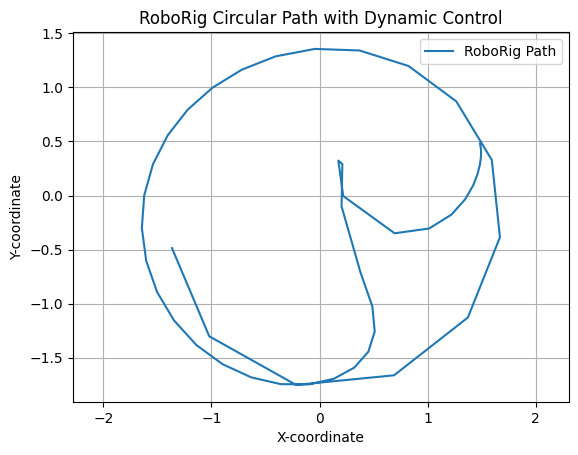

In [10]:
plt.plot(trajectory_x, trajectory_y, label='RoboRig Path')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('RoboRig Circular Path with Dynamic Control')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Level 4

In this advanced challenge, participants will work with a planar 3R manipulator consisting of three revolute joints. Building upon the previous levels, participants must execute motion control for circular trajectory. The objective is to ensure smooth motion while avoiding singularities and addressing redundancy by minimising its kinetic energy as an optimization scheme. Participants must construct a curved path between two points within the workspace, avoiding singularities and maintaining smooth motion throughout. Develop equations of motion for the manipulator to implement feedforward control. This involves predicting the desired joint space trajectories based on the planned trajectory. Resolve redundancy in the manipulator using an optimization scheme aimed at minimising kinetic energy. This optimization scheme ensures efficient use of the manipulator's degrees of freedom while maintaining smooth and efficient motion. Submit the .csv file along with the code and simulation results.
Optimization Function = 12qdotTqdot
Trajectory: Circle [ x=sin2t , y=cos2t , total time = 4 sec]

[Hint: Trajectory  Optimization  Inverse Dynamics  Forward Dynamics  Forward Kinematics
Where is the pseudoinverse of J. The term represents the null space optimization]
Parameters:-
L1 - 2 unit
L2 - 1 unit
L3 - 1 unit
m1 - 2 kg
m2 - 1 kg
m3 - 1 kg

In [14]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters
L1 = 2  # Length of link 1 (unit: m)
L2 = 1  # Length of link 2 (unit: m)
L3 = 1  # Length of link 3 (unit: m)
m1 = 2  # Mass of link 1 (unit: kg)
m2 = 1  # Mass of link 2 (unit: kg)
m3 = 1  # Mass of link 3 (unit: kg)

# Define the trajectory
total_time = 4  # Total time for the trajectory (unit: sec)
num_points = 100  # Number of points on the trajectory
t = np.linspace(0, total_time, num_points)
x_traj = np.sin(2 * t)
y_traj = np.cos(2 * t)

# Kinematics functions
def forward_kinematics(q):
    x = L1 * np.cos(q[0]) + L2 * np.cos(q[0] + q[1]) + L3 * np.cos(np.sum(q))
    y = L1 * np.sin(q[0]) + L2 * np.sin(q[0] + q[1]) + L3 * np.sin(np.sum(q))
    return np.array([x, y])

def jacobian(q):
    J = np.zeros((2, 3))
    J[0, 0] = -L1 * np.sin(q[0]) - L2 * np.sin(q[0] + q[1]) - L3 * np.sin(np.sum(q))
    J[0, 1] = -L2 * np.sin(q[0] + q[1]) - L3 * np.sin(np.sum(q))
    J[0, 2] = -L3 * np.sin(np.sum(q))
    J[1, 0] = L1 * np.cos(q[0]) + L2 * np.cos(q[0] + q[1]) + L3 * np.cos(np.sum(q))
    J[1, 1] = L2 * np.cos(q[0] + q[1]) + L3 * np.cos(np.sum(q))
    J[1, 2] = L3 * np.cos(np.sum(q))
    return J

# Objective function for optimization (minimize kinetic energy)
def objective_function(qdot):
    qddot = np.linalg.pinv(jacobian(q)).dot(np.array([x_traj_dot[i], y_traj_dot[i]]))  # Solve inverse dynamics
    kinetic_energy = 0.5 * np.sum(m1 * L1**2 * qdot[0]**2 + m2 * (L1**2 * qdot[0]**2 + L2**2 * (qdot[0] + qdot[1])**2 + 2 * L1 * L2 * qdot[0] * (qdot[0] + qdot[1]) * np.cos(q[1])) + m3 * (L1**2 * qdot[0]**2 + L2**2 * (qdot[0] + qdot[1])**2 + L3**2 * (qdot[0] + qdot[1] + qdot[2])**2 + 2 * L1 * L2 * qdot[0] * (qdot[0] + qdot[1]) * np.cos(q[1]) + 2 * L2 * L3 * (qdot[0] + qdot[1] + qdot[2]) * (qdot[0] + qdot[1]) * np.cos(q[2])))
    return 12 * np.dot(qdot, qdot), -kinetic_energy  # Negate kinetic energy to minimize

# Initial guess for qdot
qdot_guess = np.zeros(3)

# Solve for desired joint velocities using optimization
x_traj_dot = np.gradient(x_traj, t)
y_traj_dot = np.gradient(y_traj, t)
result = minimize(objective_function, qdot_guess, method='BFGS')

if result.success:
    qdot_desired = result.x
    print("Desired joint velocities:", qdot_desired)
else:
    print("Optimization failed")

# Simulate motion using forward kinematics
q = np.zeros((num_points, 3))
for i in range(num_points):
    qddot = np.linalg.pinv(jacobian(q[i])).dot(np.array([x_traj_dot[i], y_traj_dot[i]]))  # Solve inverse dynamics
    qdot = qdot_desired
    qdot_desired = result.x  # Update desired joint velocities for the next timestep
    qdot = qdot + 0.01 * (qdot_desired - qdot)  # Apply feedback control
    q[i] = q[i] + 0.01 * qdot  # Integrate to find joint angles

# Plot trajectory
plt.plot(x_traj, y_traj, label="Desired Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Circular Trajectory")
plt.grid(True)
plt.legend()
plt.show()

# Save joint angles to a CSV file
np.savetxt('joint_angles.csv', q, delimiter=',')


NameError: name 'q' is not defined